In [97]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib

matplotlib.rcParams.update({'font.size': 16})



In [98]:
path='tests_small/'
filename='noisy_projections.top'

fov=60
px=512
scale=fov/px ## *100 from 


In [99]:
energy_contr=[]

energies=[]
deviations=[]

atomarray=[]
seenarray=[]
for subdir, dirs, files in sorted(os.walk(path)):
    for file in files:
        if file==filename:
            f=os.path.join(subdir, file)
            print('reading '+f)
            chapter=-1
            ats=[[],[]]
            seens=[[],[]]

            with open(f,'r') as inp:
                for line in inp:
                    splitline=line.strip().split('\t')
                    if line.startswith('#ENERGY_CONTRIBUTION'):
                        ec=int(splitline[1])/100
                        energy_contr.append(ec)
                        continue                        
                    if line.startswith('#ENERGY'):       
                        en=float(splitline[1])
                        energies.append(en)
                        print(str(ec)+'\t'+str(en))
                        
                    if line.startswith('#DEVIATION'):     
                        dev=float(splitline[1])*100 # [100pm² -> 1pm²]
                        deviations.append(dev)
                        continue
                        
                    if line.startswith('VIEW'):
                        chapter+=1
                        continue
                    if line.startswith('ATOM'):
                        if chapter!=-1:
                            if int(splitline[1])>=0:
                                ats[chapter].append(
                                    [float(splitline[2]),float(splitline[3])])
                    if line.startswith('SEEN'):
                        if chapter!=-1:
                            if int(splitline[1])>=0:
                                if float(splitline[2])==0 and float(splitline[3])==0:
                                    del ats[chapter][-1]
                                    continue
                                    
                                seens[chapter].append(
                                    [float(splitline[2]),float(splitline[3])])
                            
            atomarray.append(np.array(ats))
            seenarray.append(np.array(seens))
            
#atomarray=np.array(atomarray)*scale
#seenarray=np.array(seenarray)*scale
#deviations=np.sqrt(deviations)


reading tests_small/noisy_projections.top
0.0	-6.591177530278937
reading tests_small/001/noisy_projections.top
0.01	-6.623413724408423
reading tests_small/003/noisy_projections.top
0.03	-6.672318508916384
reading tests_small/005/noisy_projections.top
0.05	-6.709479170828541
reading tests_small/007/noisy_projections.top
0.07	-6.7391441405984915
reading tests_small/010/noisy_projections.top
0.1	-6.773674600707004
reading tests_small/015/noisy_projections.top
0.15	-6.8128819857975165
reading tests_small/020/noisy_projections.top
0.2	-6.838730450106461
reading tests_small/030/noisy_projections.top
0.3	-6.871356873641532
reading tests_small/040/noisy_projections.top
0.4	-6.892206749649044
reading tests_small/050/noisy_projections.top
0.5	-6.907796196177166
reading tests_small/060/noisy_projections.top
0.6	-6.920774655754858
reading tests_small/070/noisy_projections.top
0.7	-6.932331548225432
reading tests_small/080/noisy_projections.top
0.8	-6.943029799684184
reading tests_small/082/noisy_p

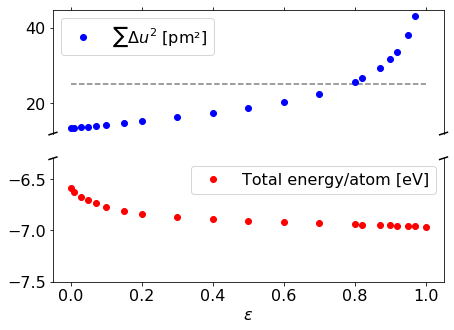

In [100]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True,figsize=(7,5))
ax.plot(energy_contr,deviations,'bo')
ax2.plot(energy_contr,energies,'ro')

xlims=(-0.05,1.05)

# zoom-in / limit the view to different portions of the data
offset=1.5
ax.set_ylim(np.min(deviations)-offset, np.max(deviations[:-1])+offset)  # outliers only
ax2.set_ylim(np.min(energies)-offset, np.max(energies[:-1])+offset)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
ax.legend(['$\sum \Delta u^2$ [pm²]'])
ax2.legend(['Total energy/atom [eV]'])

ax.set_xlim(xlims)
ax2.set_ylim(-7.5,-6.3)
ax.hlines(25,0,1,color='gray',linestyle='--')
#ax.vlines(0.8,-8,40,color='gray',linestyle='--')
#plt.vlines(0.8,-9,40,color='gray',linestyle='--')
plt.xlabel('$\epsilon$')
plt.savefig('energy_contr.svg')
plt.show()


# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

In [152]:
print(energies[15]-energies[13])
print(deviations[15]-deviations[13])

-0.007129363902859787
3.668456978513202


average deviation vector per atom:	0.4548579840637708


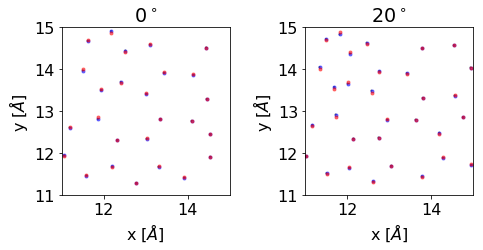

average deviation vector per atom:	0.5539579629998738


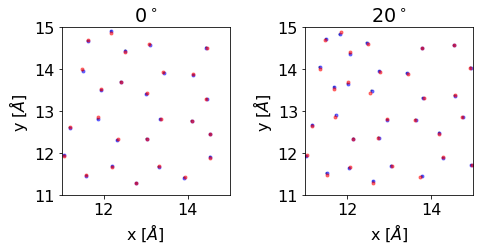

average deviation vector per atom:	3.1861253672123073


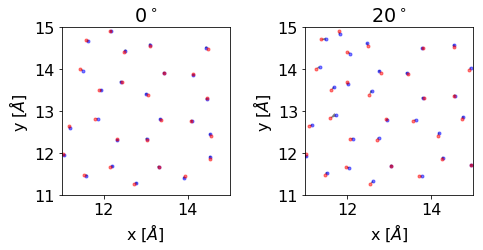

In [156]:
## forceplot (vectorplot)

#f=plt.figure(figsize=(8,6))

for i in range(len(atomarray)):
    if i!=0 and i!=10 and i!=len(atomarray)-1:
        continue

    atoms=atomarray[i]*scale### energy 100, view 2
    seens=seenarray[i]*scale


    deviationvector=np.sqrt(np.sum((np.sum((seens-atoms),axis=0))**2))
    print('average deviation vector per atom:\t'+str(deviationvector))
    f,ax=plt.subplots(1,2,figsize=(7,5))
    angl=['$0^\circ$','$20^\circ$']
    for j in range(2):
        ax[j].plot(atoms[j][:,0],atoms[j][:,1],'bo',ms=3,alpha=0.5)
        ax[j].plot(seens[j][:,0],seens[j][:,1],'ro',ms=3,alpha=0.5)
        ax[j].quiver(atoms[j][:,0],atoms[j][:,1],seens[j][:,0]-atoms[j][:,0],seens[j][:,1]-atoms[j][:,1],
               scale=1,angles="xy", scale_units="xy",alpha=0.5,width=0.015)
        ax[j].set_aspect('equal')
        ax[j].set_xlim((11,15))
        ax[j].set_ylim((11,15))
        ax[j].set_xlabel('x [$\AA$]')
        ax[j].set_ylabel('y [$\AA$]')
        ax[j].set_title(angl[j])
    plt.tight_layout()
    plt.savefig(path+'dev'+str(i)+'.svg')
    plt.show()

In [108]:
a=ax[i]

(346, 2)

In [158]:
seens[aid,0]

108.05517275572653